# 지도 학습 - 문제 유형

- `모듈명(df['실제값'], df['예측값'])`

* nbextensions 설치
``` python 
!pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user
``` 

* jupyter notebook 재실행 - Edit - nbextensions config - Tabel of contenst 체크

## 회귀 (Regression)
- 독립변수(특성)과 종속변수(레이블)간 관계를 모델링하는 방법
- 레이블 또는  타겟이 연속형일때 사용
- 독립변수와 종속변수의 관계를 기반으로 최적의 회귀 계수를 찾음|## 회귀 성능 평가

* git hub에 있는 csv 파일을 dataframe으로 가져오기

In [1]:
# 회귀 예측 결과 데이터 불러오기
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/park-ys2-gs/standard_b/main/regression_sample.csv')
df.head()

,실제값,예측값
0,22.6,25.0
1,50.0,23.7
2,23.0,29.1
3,8.3,12.3
4,21.2,21.6


### R Squared
- `sklearn.metrics.r2_score`
- 실제 값의 분산 대비 예측 값의 분산 비율(최고 : 1, 최악 : 음수) 
- 모델 예측 성능(설명력)을 평가하는 목적

In [2]:
import numpy as np
1 - (np.sum(np.square(df['실제값'] - df['예측값'])) /  np.sum(np.square(df['실제값'] - df['실제값'].mean())))

0.5145225055729962

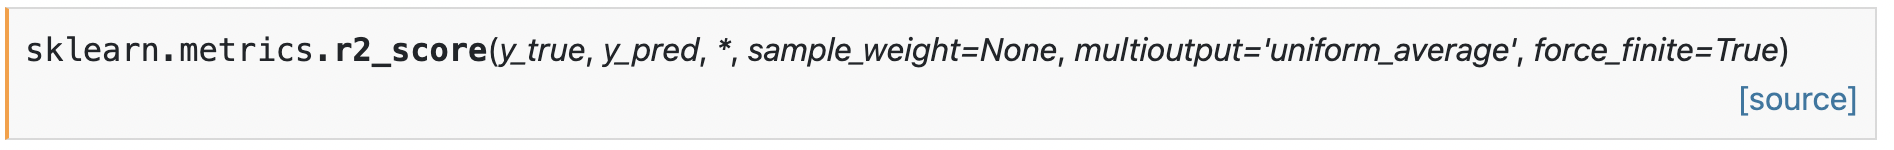

* force_finite = True 로 되어있기 때문에 r2_score의 최소값이 0이 됨. (음수가 나와도 0으로 보여준다는 뜻.)

In [3]:
from sklearn.metrics import r2_score
r2_score(df['실제값'], df['예측값'])

0.5145225055729962

### Mean Absolute Error
- `sklearn.metrics.mean_absolute_error`
- 실제 값과 예측 값의 차이를 절대값으로 변환해 평균 계산
- 오차의 크기를 그래도 반영하여 오차 평균 크기를 확인
- 작을수록 좋지만 너무 작으면 과적합일 수 있음

In [4]:
np.mean(np.abs(df['실제값'] - df['예측값']))

3.9294117647058826

In [5]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['실제값'], df['예측값'])

3.9294117647058826

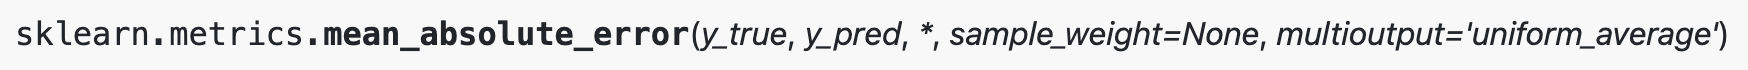

In [6]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_absolute_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred, multioutput='raw_values'))
print(mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))  # 가중치
print(mean_absolute_error(y_true, y_pred, multioutput=[0.7, 0.3]))  # 가중치

0.75
[0.5 1. ]
0.85
0.6499999999999999


### Mean Squared Error
- `sklearn.metrics.mean_squared_error(squared=True)`
- 실제 값과 예측 값의 차이를 제곱해서 평균 계산
- 작을수록 좋지만 너무 작으면 과적합일 수 있음
- 큰 오차를 더 크게, 작은 오차는 더 작게 평가하여 이상치에 민감

In [7]:
np.mean(np.square(df['실제값'] - df['예측값']))

41.762745098039225

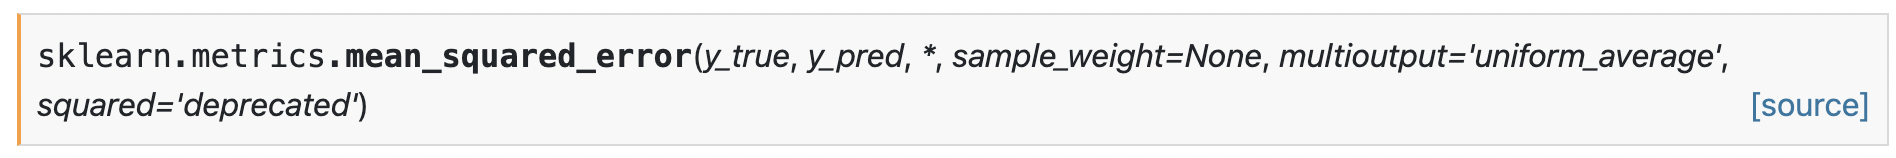

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['실제값'], df['예측값'])

41.762745098039225

### Root Mean Squared Error
- sklearn.metrics.mean_squared_error(squared=False)
- 오차의 평균 크기를 확인하는 목적, 모델 간 잔차 비교 가능 
    - 이상치에 덜 민감함
- 큰 오류값 차이에 대해 크게 패널티를 주기 때문
- MSE의 크기를 줄이기 위한 목적으로 사용

In [9]:
np.sqrt(np.mean(np.square(df['실제값'] - df['예측값'])))

6.462410161699675

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['실제값'], df['예측값'], squared=False)  # 사용하지 않는 것이 좋다. 

6.462410161699675

In [11]:
import sklearn
print(sklearn.__version__)

1.3.0


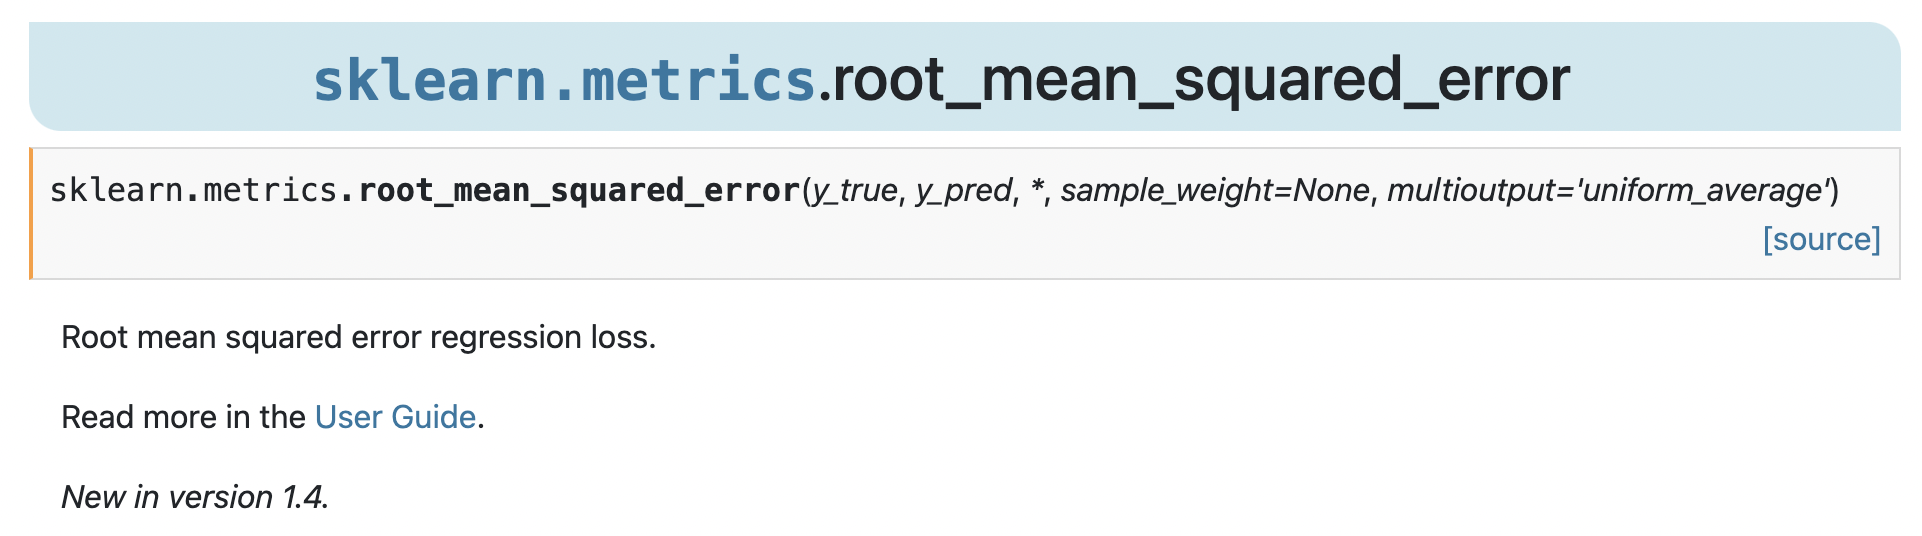

In [12]:
from sklearn.metrics import root_mean_squared_error  # 1.4부터 지원.
root_mean_squared_error(df['실제값'], df['예측값'])

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/Users/yeongsun/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

### 복습

In [29]:
# 회귀 예측 결과 데이터 불러오기
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/park-ys2-gs/standard_b/main/regression_sample.csv')
df.head()

,실제값,예측값
0,22.6,25.0
1,50.0,23.7
2,23.0,29.1
3,8.3,12.3
4,21.2,21.6


In [30]:
# 실제값과 예측값의 R squared 값을 구하시오, 힌트: r2_score

In [ ]:
# 실제값과 예측값의 MAE 값을 구하시오. 힌트: mean_absolute_error

In [ ]:
# 실제값과 예측값의 MSE 값을 구하시오. 힌트: mean_squared_error

In [ ]:
# 실제값과 예측값의 MSE 값을 구하시오. 힌트: mean_squared_error, squared 옵션

## 분류 (Classification)
- 어떤 대상을 정해진 범주에 구분해 넣는 작업
- **주어진 특성에 따라 어떤 대상을 범주(target)로 구분하는 방법**
    - 레이블 또는 타겟이 범주형일때 사용
- 범주가 2개인 경우 **이진 분류 (Binary Classification)**
- 범주가 세개 이상인 경우 **다중 분류 (MultiClass Classification)**

In [31]:
# 회귀 예측 결과 데이터 불러오기
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/park-ys2-gs/standard_b/main/classification_sample.csv')
df.head()

,실제값,예측값
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0


### 혼동 행렬(Confusion Matrix)
- `sklearn.metrics.confusion_matrix`
- 예측 값이 실제 값과 일치하는지 분류하는 분류표
- 표의 한쪽 열에는 예측한 범주, 다른 한쪽은 실제 범주를 나타냄
- 이진 분류의 경우 예측한 범주와 실제 범주에 따라 4가지 지표로 볼 수 있음
    - True Positive : Positive로 예측된 결과가 맞음
    - False Negative : Negative로 예측된 결과가 틀림
    - False Positive : Positive로 예측된 결과가 틀림
    - True Negative : Negative로 예측된 결과가 맞음

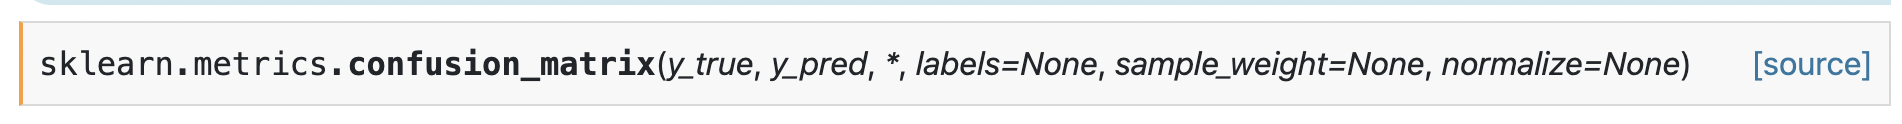

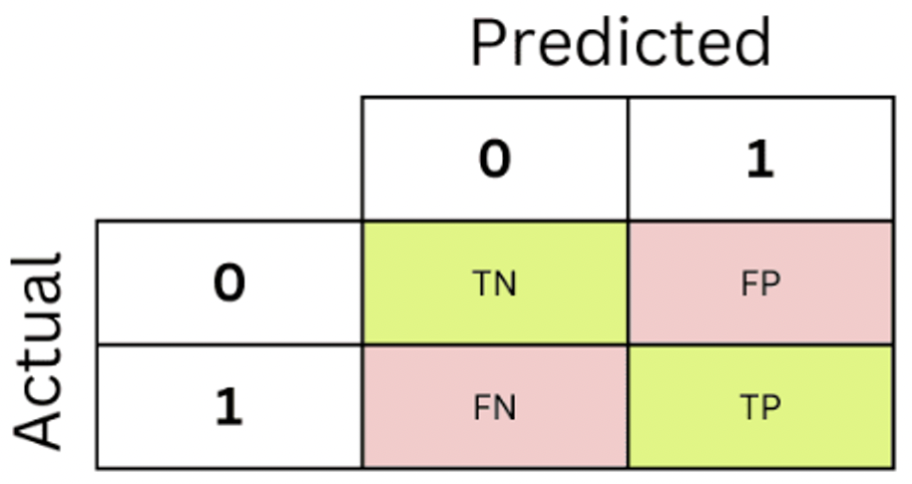

In [14]:
# 혼동 행렬 계산
from sklearn.metrics import confusion_matrix
confusion_matrix(df['실제값'], df['예측값'])

array([[3, 0],
       [2, 2]])

In [15]:
# 혼동 행렬 계산
from sklearn.metrics import confusion_matrix
confusion_matrix(df['실제값'], df['예측값'], normalize='true')  # {‘true’, ‘pred’, ‘all’}

array([[1. , 0. ],
       [0.5, 0.5]])

In [16]:
# 혼동 행렬 계산 결과 저장
tn, fp, fn, tp = confusion_matrix(df['실제값'], df['예측값']).ravel()  # 다차원의 배열을 1차원의 배열로 평평하게 펴줌. 
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 3
False Positive : 0
False Negative : 2
True Positive : 2


### 정확도(Accuracy) 
- `sklearn.metrics.accuracy_score`
- (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝐹𝑁+𝐹𝑃+𝑇𝑁)
- 전체 데이터 중 올바르게 분류 한 비율

In [17]:
(tp + tn) / (tp + fn + fp + tn)

0.7142857142857143

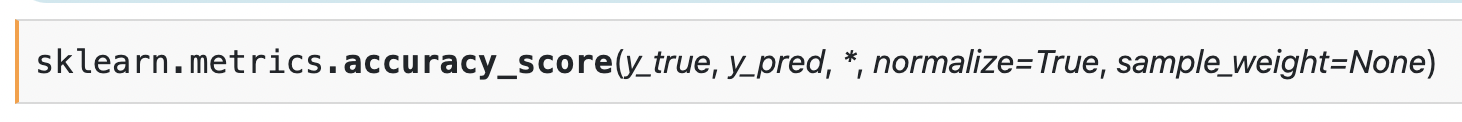

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(df['실제값'], df['예측값'])

0.7142857142857143

In [19]:
accuracy_score(df['실제값'], df['예측값'], normalize=False)  # return the number of correctly classified samples.

5

### 재현률(Recall)
- `sklearn.metrics.recall_score`
- 𝑇𝑃/(𝑇𝑃+𝐹𝑁)
- 실제 전체 긍정 수에서 참 긍정의 비율

In [20]:
tp / (tp + fn)

0.5

In [21]:
from sklearn.metrics import recall_score
recall_score(df['실제값'], df['예측값'])

0.5

### 정밀도(Precision)  
- `sklearn.metrics.precision_score`
- 𝑇𝑃/(𝑇𝑃+𝐹𝑃)
- 예측한 전체 긍정 중 참 긍정의 비율


In [22]:
tp / (tp + fp)

1.0

In [23]:
from sklearn.metrics import precision_score
precision_score(df['실제값'], df['예측값'])

1.0

## F1 Score  
- `sklearn.metrics.f1_score`
- 2𝑇𝑃/(2𝑇𝑃+𝐹𝑃+𝐹𝑁)
- 정밀도와 재현율의 조화 평균
- 정밀도과 재현율이 0에 가까울수록 F1 score도 동일하게 낮은 값을 갖도록 하기 위함

In [24]:
2 * tp / (2 * tp + fp + fn)

0.6666666666666666

In [25]:
from sklearn.metrics import f1_score
f1_score(df['실제값'], df['예측값'])

0.6666666666666666

In [26]:
from sklearn.metrics import classification_report
print(classification_report(df['실제값'], df['예측값']))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.50      0.67         4

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



In [27]:
from sklearn.metrics import classification_report
print(classification_report(df['실제값'], df['예측값'], target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.60      1.00      0.75         3
     class 1       1.00      0.50      0.67         4

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



## 복습

In [32]:
# 회귀 예측 결과 데이터 불러오기
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/park-ys2-gs/standard_b/main/classification_sample.csv')
df.head()

,실제값,예측값
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0


In [33]:
# 혼돈 행렬을 계산하시오. 힌트: confusion_matrix

In [34]:
# 정확도를 계산하시오. 힌트: accuracy_score

In [ ]:
# 재현률을 계산하시오. 힌트: recall_score

In [ ]:
# 정밀도를 계산하시오. 힌트: precision_score

In [35]:
# f1 score를 계산하시오. 힌트: f1_score

In [36]:
# classification_report 를 작성하시오. 힌트: classification_report